# Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autogluon.tabular import TabularPredictor

## Menyiapkan data yang akan digunakan

### Data Understanding

Apa tujuan dari proyek ini ?
- Melakukan prediksi apakah suatu jamur dapat dimakan atau beracun berdasarkan karakteristik fisiknya

Informasi dataset

dataset ini mencakup deskripsi sampel hipotetis yang sesuai dengan 23 spesies jamur berinsang dalam Keluarga Agaricus dan Lepiota (hal. 500-525). Setiap spesies diidentifikasi sebagai pasti dapat dimakan, pasti beracun, atau kelayakan makanannya tidak diketahui dan tidak disarankan. Kelas terakhir ini digabungkan dengan yang beracun. Panduan ini dengan jelas menyatakan bahwa tidak ada aturan sederhana untuk menentukan kelayakan makan sebuah jamur; tidak ada aturan seperti “tiga daun, biarkan saja” untuk Poisonous Oak dan Ivy.

# Data Preparation

In [2]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [3]:
df_test = pd.read_csv('data/test.csv')
df_test.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,13.70,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


##### Mengecek data kosong

In [212]:
df_train.isna().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [213]:
df_train.shape

(3116945, 22)

In [214]:
# Menghapus kolom yang memiliki data kosong lebih dari 100
df_train = df_train.drop(columns=['cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 
                                  'veil-type', 'veil-color', 'ring-type', 'spore-print-color'])


In [215]:
df_train.isna().sum()

id                       0
class                    0
cap-diameter             4
cap-shape               40
cap-color               12
does-bruise-or-bleed     8
gill-color              57
stem-height              0
stem-width               0
stem-color              38
has-ring                24
habitat                 45
season                   0
dtype: int64

In [216]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-color            object 
 7   stem-height           float64
 8   stem-width            float64
 9   stem-color            object 
 10  has-ring              object 
 11  habitat               object 
 12  season                object 
dtypes: float64(3), int64(1), object(9)
memory usage: 309.1+ MB


In [6]:
# Menghapus kolom yang memiliki data kosong lebih dari 100
df_test = df_test.drop(columns=['cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 
                                  'veil-type', 'veil-color', 'ring-type', 'spore-print-color'])

In [218]:
# Data kosong numeric yang kurang dari 100 akan diisi dengan nilai mean dari masing-masing kolomnya
numeric_columns = ['cap-diameter', 'stem-height', 'stem-width']

for columns in numeric_columns:
    df_train[columns].fillna(df_train[columns].mean(), inplace=True)

In [219]:
df_train.isna().sum()

id                       0
class                    0
cap-diameter             0
cap-shape               40
cap-color               12
does-bruise-or-bleed     8
gill-color              57
stem-height              0
stem-width               0
stem-color              38
has-ring                24
habitat                 45
season                   0
dtype: int64

In [220]:
# Data kosong categoric yang kurang dari 100 akan diisi dengan nilai modus dari masing-masing kolomnya
categoric_columns = ['cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color', 'stem-color', 'has-ring', 'habitat']

for columns in categoric_columns:
    df_train[columns].fillna(df_train[columns].mode()[0], inplace=True)

In [221]:
df_train.isna().sum()

id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
habitat                 0
season                  0
dtype: int64

##### Mengecek data duplikat

In [222]:
df_train.duplicated().any()

False

In [223]:
df_train.shape

(3116945, 13)

In [224]:
# Menghapus data duplikat
df_train = df_train.drop_duplicates()
df_train.duplicated().any()

False

In [225]:
df_train.shape

(3116945, 13)

In [226]:
df_train.describe(include = 'all')

,id,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
count,3.116945e+06,3116945,3.116945e+06,3116945,3116945,3116945,3116945,3.116945e+06,3.116945e+06,3116945,3116945,3116945,3116945
unique,NaN,2,NaN,74,78,26,63,NaN,NaN,59,23,52,4
top,NaN,p,NaN,x,n,f,w,NaN,NaN,w,f,d,a
freq,NaN,1705396,NaN,1436066,1359554,2569751,931595,NaN,NaN,1196675,2368844,2177618,1543321
mean,1.558472e+06,NaN,6.309848e+00,NaN,NaN,NaN,NaN,6.348333e+00,1.115379e+01,NaN,NaN,NaN,NaN
std,8.997847e+05,NaN,4.657928e+00,NaN,NaN,NaN,NaN,2.699755e+00,8.095477e+00,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,3.000000e-02,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
25%,7.792360e+05,NaN,3.320000e+00,NaN,NaN,NaN,NaN,4.670000e+00,4.970000e+00,NaN,NaN,NaN,NaN
50%,1.558472e+06,NaN,5.750000e+00,NaN,NaN,NaN,NaN,5.880000e+00,9.650000e+00,NaN,NaN,NaN,NaN
75%,2.337708e+06,NaN,8.240000e+00,NaN,NaN,NaN,NaN,7.410000e+00,1.563000e+01,NaN,NaN,NaN,NaN


##### Exploratoty Data Analysis

##### Analisis univariate

In [227]:
df_train.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-color', 'stem-height', 'stem-width',
       'stem-color', 'has-ring', 'habitat', 'season'],
      dtype='object')

In [228]:
df_train['class'].value_counts()

class
p    1705396
e    1411549
Name: count, dtype: int64

In [229]:
df_train['cap-diameter'].value_counts()

cap-diameter
1.49     8164
3.18     7942
3.14     7361
1.51     7072
4.04     6828
         ... 
25.38       1
58.34       1
31.76       1
39.59       1
54.07       1
Name: count, Length: 3914, dtype: int64

In [230]:
df_train['cap-diameter'].value_counts().head(50)

cap-diameter
1.49    8164
3.18    7942
3.14    7361
1.51    7072
4.04    6828
3.28    6826
2.87    6807
3.85    6642
3.24    6634
1.52    6562
3.45    6495
3.33    6412
3.58    6233
3.44    6186
3.48    6168
3.25    6072
7.10    6037
3.12    6001
3.04    5999
7.35    5962
3.34    5946
6.31    5887
3.71    5873
1.55    5859
7.86    5858
3.17    5827
3.13    5792
3.09    5782
7.83    5767
3.88    5753
1.45    5750
1.44    5732
3.40    5728
5.73    5704
3.62    5703
3.84    5629
3.52    5586
6.86    5583
7.41    5582
3.97    5501
6.52    5469
3.41    5449
6.24    5444
5.82    5437
6.35    5426
1.48    5400
2.94    5387
1.59    5379
3.00    5352
3.55    5322
Name: count, dtype: int64

In [231]:
df_train['cap-shape'].value_counts().head(15)

cap-shape
x    1436066
f     676238
s     365146
b     318646
o     108835
p     106967
c     104520
d         65
e         60
n         41
t         36
w         36
g         34
y         33
r         32
Name: count, dtype: int64

In [232]:
df_train['cap-shape'].unique()

array(['f', 'x', 'p', 'b', 'o', 'c', 's', 'd', 'e', 'n', 'w', 'k', 'l',
       '19.29', '5 f', 't', 'g', 'z', 'a', '2.85', '7 x', 'r', 'u',
       '3.55', 'is s', 'y', '4.22', '3.6', '21.56', 'i', '6 x', '24.16',
       '8', 'm', 'ring-type', '10.13', 'is p', '7.43', 'h', '0.82',
       '10.46', '2.77', '2.94', '12.62', '5.15', '19.04', '4.97', '49.21',
       'b f', '9.13', '1.66', '3.37', '7.21', '3.25', '11.12', '3 x',
       '4.3', '7.41', '6.21', '8.29', '54.78', '20.25', '3.52', '3.04',
       '2.63', '3.91', '6.44', '8.3', '7.6', '17.44', '4.33', '2.82',
       '6.53', '19.06'], dtype=object)

In [233]:
# Karena data pada kolom cap-shape memiliki data yang imbalance, maka saya akan menghapus data yang kurang dari 66
value_counts = df_train['cap-shape'].value_counts()
to_keep = value_counts[value_counts >= 66].index
df_train = df_train[df_train['cap-shape'].isin(to_keep)]

In [234]:
df_train['cap-shape'].value_counts()

cap-shape
x    1436066
f     676238
s     365146
b     318646
o     108835
p     106967
c     104520
Name: count, dtype: int64

In [235]:
df_train['cap-color'].value_counts().head(15)

cap-color
n    1359335
y     386559
w     379353
g     210795
e     197261
o     178829
p      91828
r      78219
u      73154
b      61307
k      59871
l      39552
f         53
d         48
s         39
Name: count, dtype: int64

In [236]:
# Karena data pada kolom cap-color memiliki data yang imbalance, maka saya akan menghapus data yang kurang dari 54
value_counts = df_train['cap-color'].value_counts()
to_keep = value_counts[value_counts >= 54].index
df_train = df_train[df_train['cap-color'].isin(to_keep)]

In [237]:
df_train['cap-color'].value_counts()

cap-color
n    1359335
y     386559
w     379353
g     210795
e     197261
o     178829
p      91828
r      78219
u      73154
b      61307
k      59871
l      39552
Name: count, dtype: int64

In [238]:
df_train['does-bruise-or-bleed'].value_counts()

does-bruise-or-bleed
f           2569028
t            546927
w                14
c                11
h                 9
a                 7
b                 7
x                 7
y                 7
s                 6
k                 5
e                 4
l                 4
p                 4
d                 4
g                 3
z                 3
o                 3
i                 2
n                 2
r                 1
3.43              1
has-ring          1
4.42              1
2.9               1
u                 1
Name: count, dtype: int64

In [239]:
# Karena data pada kolom does-bruise-or-bleed memiliki data yang imbalance, maka saya akan menghapus data yang kurang dari 15
value_counts = df_train['does-bruise-or-bleed'].value_counts()
to_keep = value_counts[value_counts >= 15].index
df_train = df_train[df_train['does-bruise-or-bleed'].isin(to_keep)]

In [240]:
df_train['does-bruise-or-bleed'].value_counts()

does-bruise-or-bleed
f    2569028
t     546927
Name: count, dtype: int64

In [241]:
df_train['gill-color'].value_counts().head(15)

gill-color
w    931277
n    543227
y    469322
p    343531
g    212084
o    157079
k    127911
f    119657
r     62782
e     56039
b     47223
u     45388
l        55
d        54
t        54
Name: count, dtype: int64

In [242]:
# Karena data pada kolom gill-color memiliki data yang imbalance, maka saya akan menghapus data yang kurang dari 56
value_counts = df_train['gill-color'].value_counts()
to_keep = value_counts[value_counts >= 56].index
df_train = df_train[df_train['gill-color'].isin(to_keep)]

In [243]:
df_train['gill-color'].value_counts()

gill-color
w    931277
n    543227
y    469322
p    343531
g    212084
o    157079
k    127911
f    119657
r     62782
e     56039
b     47223
u     45388
Name: count, dtype: int64

In [244]:
df_train['stem-height'].value_counts().head(30)

stem-height
5.24    12328
5.92    11818
5.32    10985
5.35    10428
5.99    10394
6.03    10267
5.54    10260
5.77    10149
4.27    10074
5.65     9988
5.96     9887
5.93     9878
4.73     9499
5.75     9472
5.88     9420
4.92     9334
5.98     9209
4.94     9029
5.28     9024
6.12     8912
4.98     8893
6.00     8816
5.22     8796
5.43     8765
6.58     8763
5.47     8756
6.07     8748
6.09     8722
4.99     8504
4.96     8480
Name: count, dtype: int64

In [245]:
df_train['stem-width'].value_counts()

stem-width
2.41     7829
2.45     7350
2.49     7085
2.56     6821
2.47     6708
         ... 
75.51       1
60.92       1
54.45       1
48.17       1
53.44       1
Name: count, Length: 5836, dtype: int64

In [246]:
df_train['stem-width'].nunique()

5836

In [247]:
df_train['stem-color'].value_counts()

stem-color
w                    1196080
n                    1003058
y                     373811
g                     131970
o                     111507
e                     103336
u                      66964
p                      54676
k                      33660
r                      22300
l                       9969
b                       7358
f                        573
s                         51
t                         40
a                         36
x                         20
i                         19
d                         16
h                         12
m                         11
c                          7
z                          6
ring-type                  3
class                      2
spore-print-color          2
is n                       1
6.31                       1
12.92                      1
3.98                       1
20.07                      1
7.7                        1
22.6                       1
6.09                       1
17.

In [248]:
# Karena data pada kolom stem-color memiliki data yang imbalance, maka saya akan menghapus data yang kurang dari 564
value_counts = df_train['stem-color'].value_counts()
to_keep = value_counts[value_counts >= 564].index
df_train = df_train[df_train['stem-color'].isin(to_keep)]

In [249]:
df_train['stem-color'].value_counts()

stem-color
w    1196080
n    1003058
y     373811
g     131970
o     111507
e     103336
u      66964
p      54676
k      33660
r      22300
l       9969
b       7358
f        573
Name: count, dtype: int64

In [250]:
df_train['has-ring'].value_counts()

has-ring
f             2367607
t              747536
r                  16
h                  13
c                  11
l                  11
s                  11
p                  11
g                   8
z                   6
e                   6
x                   5
m                   4
y                   3
d                   3
k                   2
o                   2
n                   2
f has-ring          1
i                   1
10.3                1
w                   1
a                   1
Name: count, dtype: int64

In [251]:
# Karena data pada kolom has-ring memiliki data yang imbalance, maka saya akan menghapus data yang kurang dari 17
value_counts = df_train['has-ring'].value_counts()
to_keep = value_counts[value_counts >= 17].index
df_train = df_train[df_train['has-ring'].isin(to_keep)]

In [252]:
df_train['has-ring'].value_counts()

has-ring
f    2367607
t     747536
Name: count, dtype: int64

In [253]:
df_train['habitat'].value_counts()

habitat
d                       2176375
g                        454659
l                        171797
m                        150831
h                        120092
w                         18522
p                         17166
u                          5255
e                            54
s                            52
n                            41
t                            40
r                            38
y                            34
a                            34
k                            31
c                            26
b                            18
o                            12
f                            11
i                             7
x                             5
z                             5
habitat                       5
class                         3
spore-print-color             3
ring-type                     2
18.35                         1
3.68                          1
2.44                          1
1.66                          1


In [254]:
# Karena data pada kolom habitat memiliki data yang imbalance, maka saya akan menghapus data yang kurang dari 55
value_counts = df_train['habitat'].value_counts()
to_keep = value_counts[value_counts >= 55].index
df_train = df_train[df_train['habitat'].isin(to_keep)]

In [255]:
df_train['season'].value_counts()

season
a    1542174
u    1152738
w     278029
s     141756
Name: count, dtype: int64

##### Analisis Multivariate

In [256]:
df_train['habitat'].value_counts()

habitat
d    2176375
g     454659
l     171797
m     150831
h     120092
w      18522
p      17166
u       5255
Name: count, dtype: int64

In [257]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3114697 entries, 0 to 3116944
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-color            object 
 7   stem-height           float64
 8   stem-width            float64
 9   stem-color            object 
 10  has-ring              object 
 11  habitat               object 
 12  season                object 
dtypes: float64(3), int64(1), object(9)
memory usage: 332.7+ MB


In [258]:
df_train.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-color', 'stem-height', 'stem-width',
       'stem-color', 'has-ring', 'habitat', 'season'],
      dtype='object')

In [259]:
categoric_columns = ['season', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-color',
       'stem-color', 'has-ring', 'habitat',]

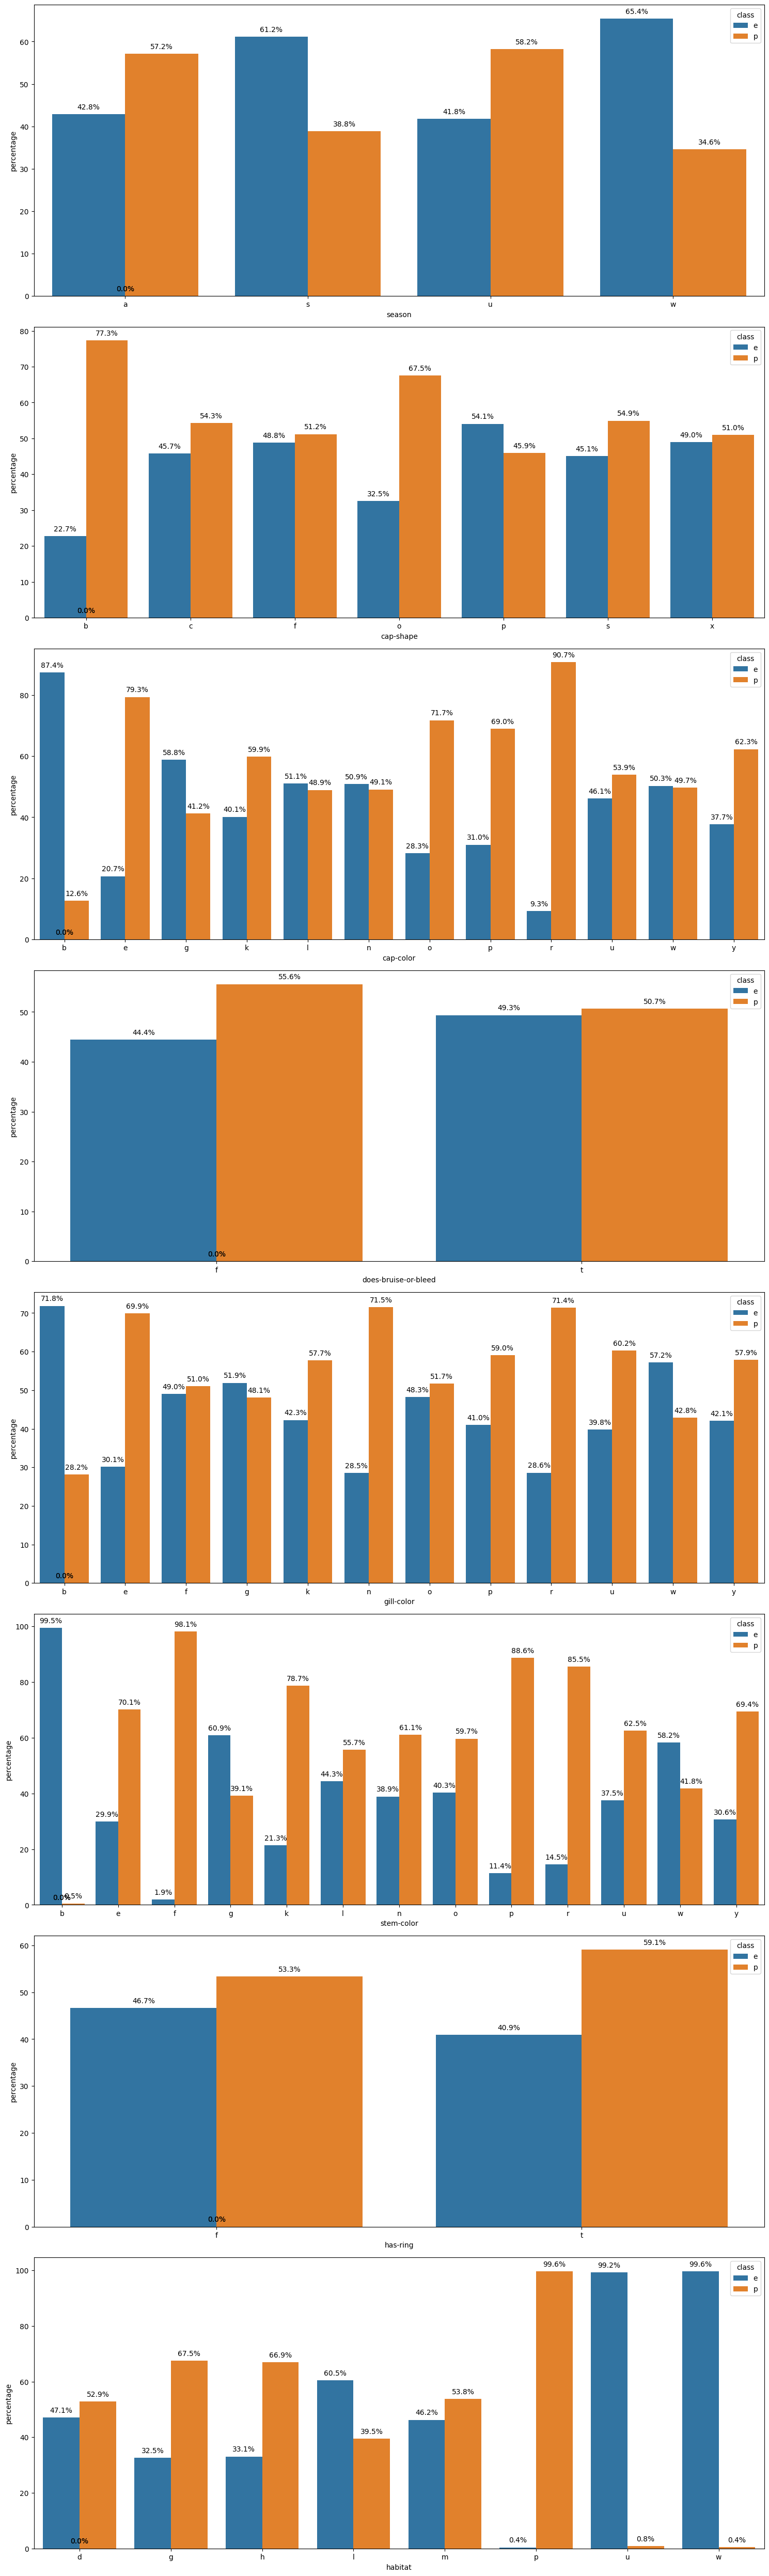

In [260]:
# Fungsi untuk plot kategori dengan persentase
def categoricalPlot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1, figsize=(15, 50))

    # Iterasi melalui setiap feature untuk membuat plot
    for i, feature in enumerate(features):
        # Menghitung persentase
        data = df.groupby([feature, segment_feature]).size().reset_index(name='counts')
        total_counts = df[feature].value_counts().reset_index()
        total_counts.columns = [feature, 'total']
        data = data.merge(total_counts, on=feature)
        data['percentage'] = (data['counts'] / data['total']) * 100

        # Plot dengan hue jika segment_feature tersedia
        sns.barplot(data=data, x=feature, y='percentage', hue=segment_feature, ax=ax[i])

        # Tambahkan teks persentase di atas setiap bar dalam plot
        for p in ax[i].patches:
            height = p.get_height()
            ax[i].annotate(f'{height:.1f}%', 
                           (p.get_x() + p.get_width() / 2., height), 
                           ha='center', va='center', 
                           xytext=(0, 10), 
                           textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Contoh penggunaan fungsi categoricalPlot_percentage
categoricalPlot(
    features=categoric_columns,
    df=df_train,
    segment_feature='class'
)

In [261]:
df_train.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-color', 'stem-height', 'stem-width',
       'stem-color', 'has-ring', 'habitat', 'season'],
      dtype='object')

In [262]:
# Pada kolom stem-color terdapat nilai yang sangat imbalance seperti 'b' dan 'f' sehingga akan dihapus
df_train = df_train[(df_train['stem-color'] != 'b') & (df_train['stem-color'] != 'f')]

In [263]:
# Pada kolom habitat terdapat nilai yang sangat imbalance seperti 'p', 'u', 'w' sehingga akan dihapus
df_train = df_train[(df_train['habitat'] != 'p') & (df_train['habitat'] != 'u') & (df_train['habitat'] != 'w')]

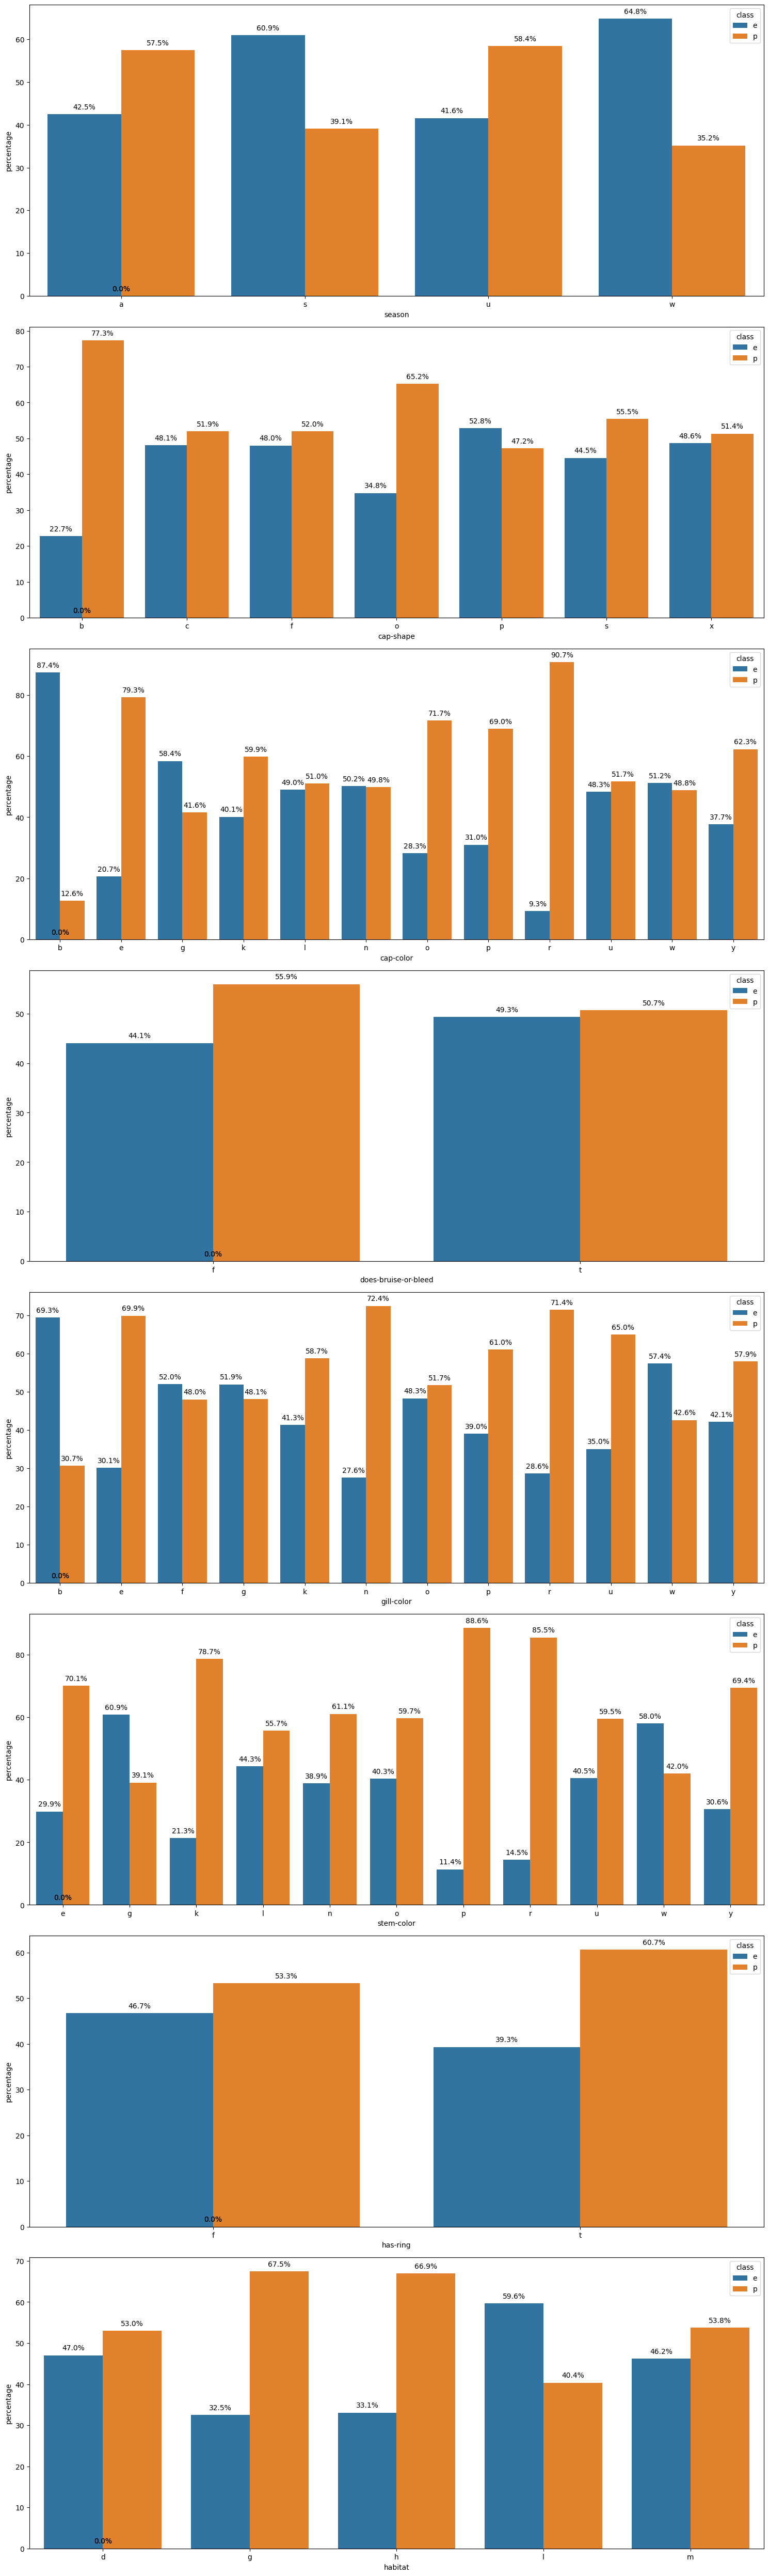

In [264]:
categoricalPlot(
    features=categoric_columns,
    df=df_train,
    segment_feature='class'
)

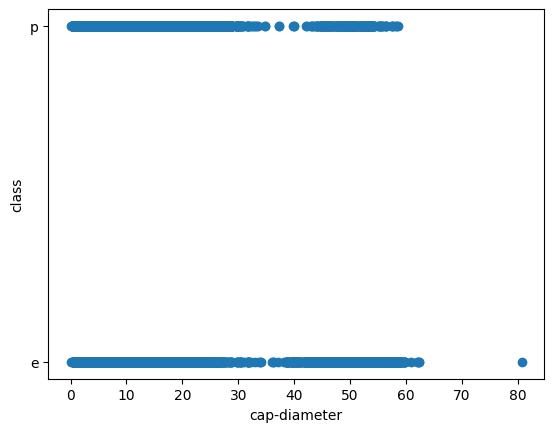

In [265]:
plt.scatter(x='cap-diameter', y='class', data=df_train)
plt.xlabel('cap-diameter')
plt.ylabel('class')
plt.show()

In [275]:
# Nilai ini terindikasi outlier, sehingga akan dihapus
df_train.query('`class` == "e" & `cap-diameter` > 70') 

,id,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
293939,293939,e,80.67,o,n,f,w,26.0,102.48,n,f,d,a


In [276]:
hapus = [293939]

In [277]:
df_train = df_train[~df_train['id'].isin(hapus)]

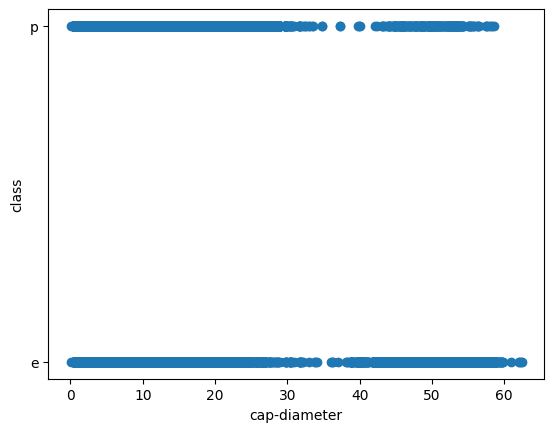

In [279]:
plt.scatter(x='cap-diameter', y='class', data=df_train)
plt.xlabel('cap-diameter')
plt.ylabel('class')
plt.show()

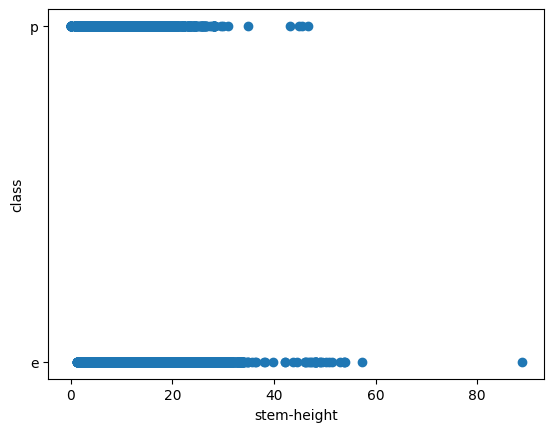

In [280]:
plt.scatter(x='stem-height', y='class', data=df_train)
plt.xlabel('stem-height')
plt.ylabel('class')
plt.show()

In [282]:
# Nilai ini terindikasi outlier, sehingga akan dihapus
df_train.query('`class` == "e" & `stem-height` > 80') 

,id,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
696546,696546,e,21.17,x,n,f,w,88.72,21.04,n,f,d,s


In [283]:
hapus = [696546]

In [284]:
df_train = df_train[~df_train['id'].isin(hapus)]

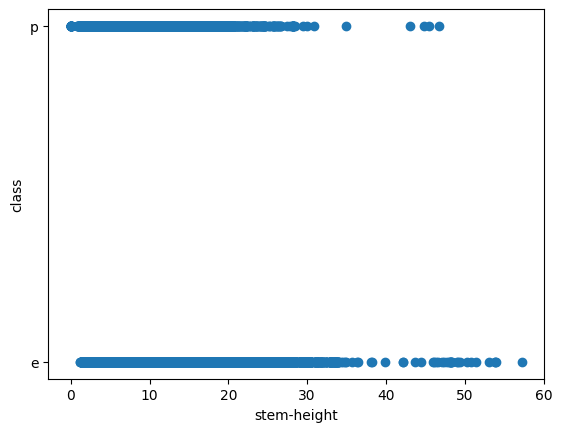

In [285]:
plt.scatter(x='stem-height', y='class', data=df_train)
plt.xlabel('stem-height')
plt.ylabel('class')
plt.show()

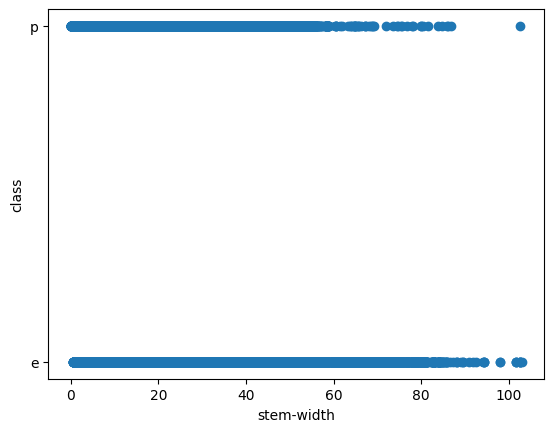

In [286]:
plt.scatter(x='stem-width', y='class', data=df_train)
plt.xlabel('stem-width')
plt.ylabel('class')
plt.show()

In [287]:
# Nilai ini terindikasi outlier, sehingga akan dihapus
df_train.query('`class` == "p" & `stem-width` > 90') 

,id,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
825512,825512,p,27.08,x,n,f,p,26.4,102.48,n,f,d,u


In [288]:
hapus = [825512]

In [289]:
df_train = df_train[~df_train['id'].isin(hapus)]

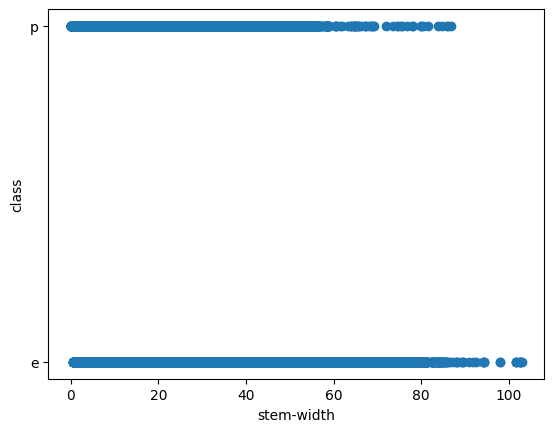

In [290]:
plt.scatter(x='stem-width', y='class', data=df_train)
plt.xlabel('stem-width')
plt.ylabel('class')
plt.show()

In [19]:
numeric_columns = ['cap-diameter', 'stem-height', 'stem-width']

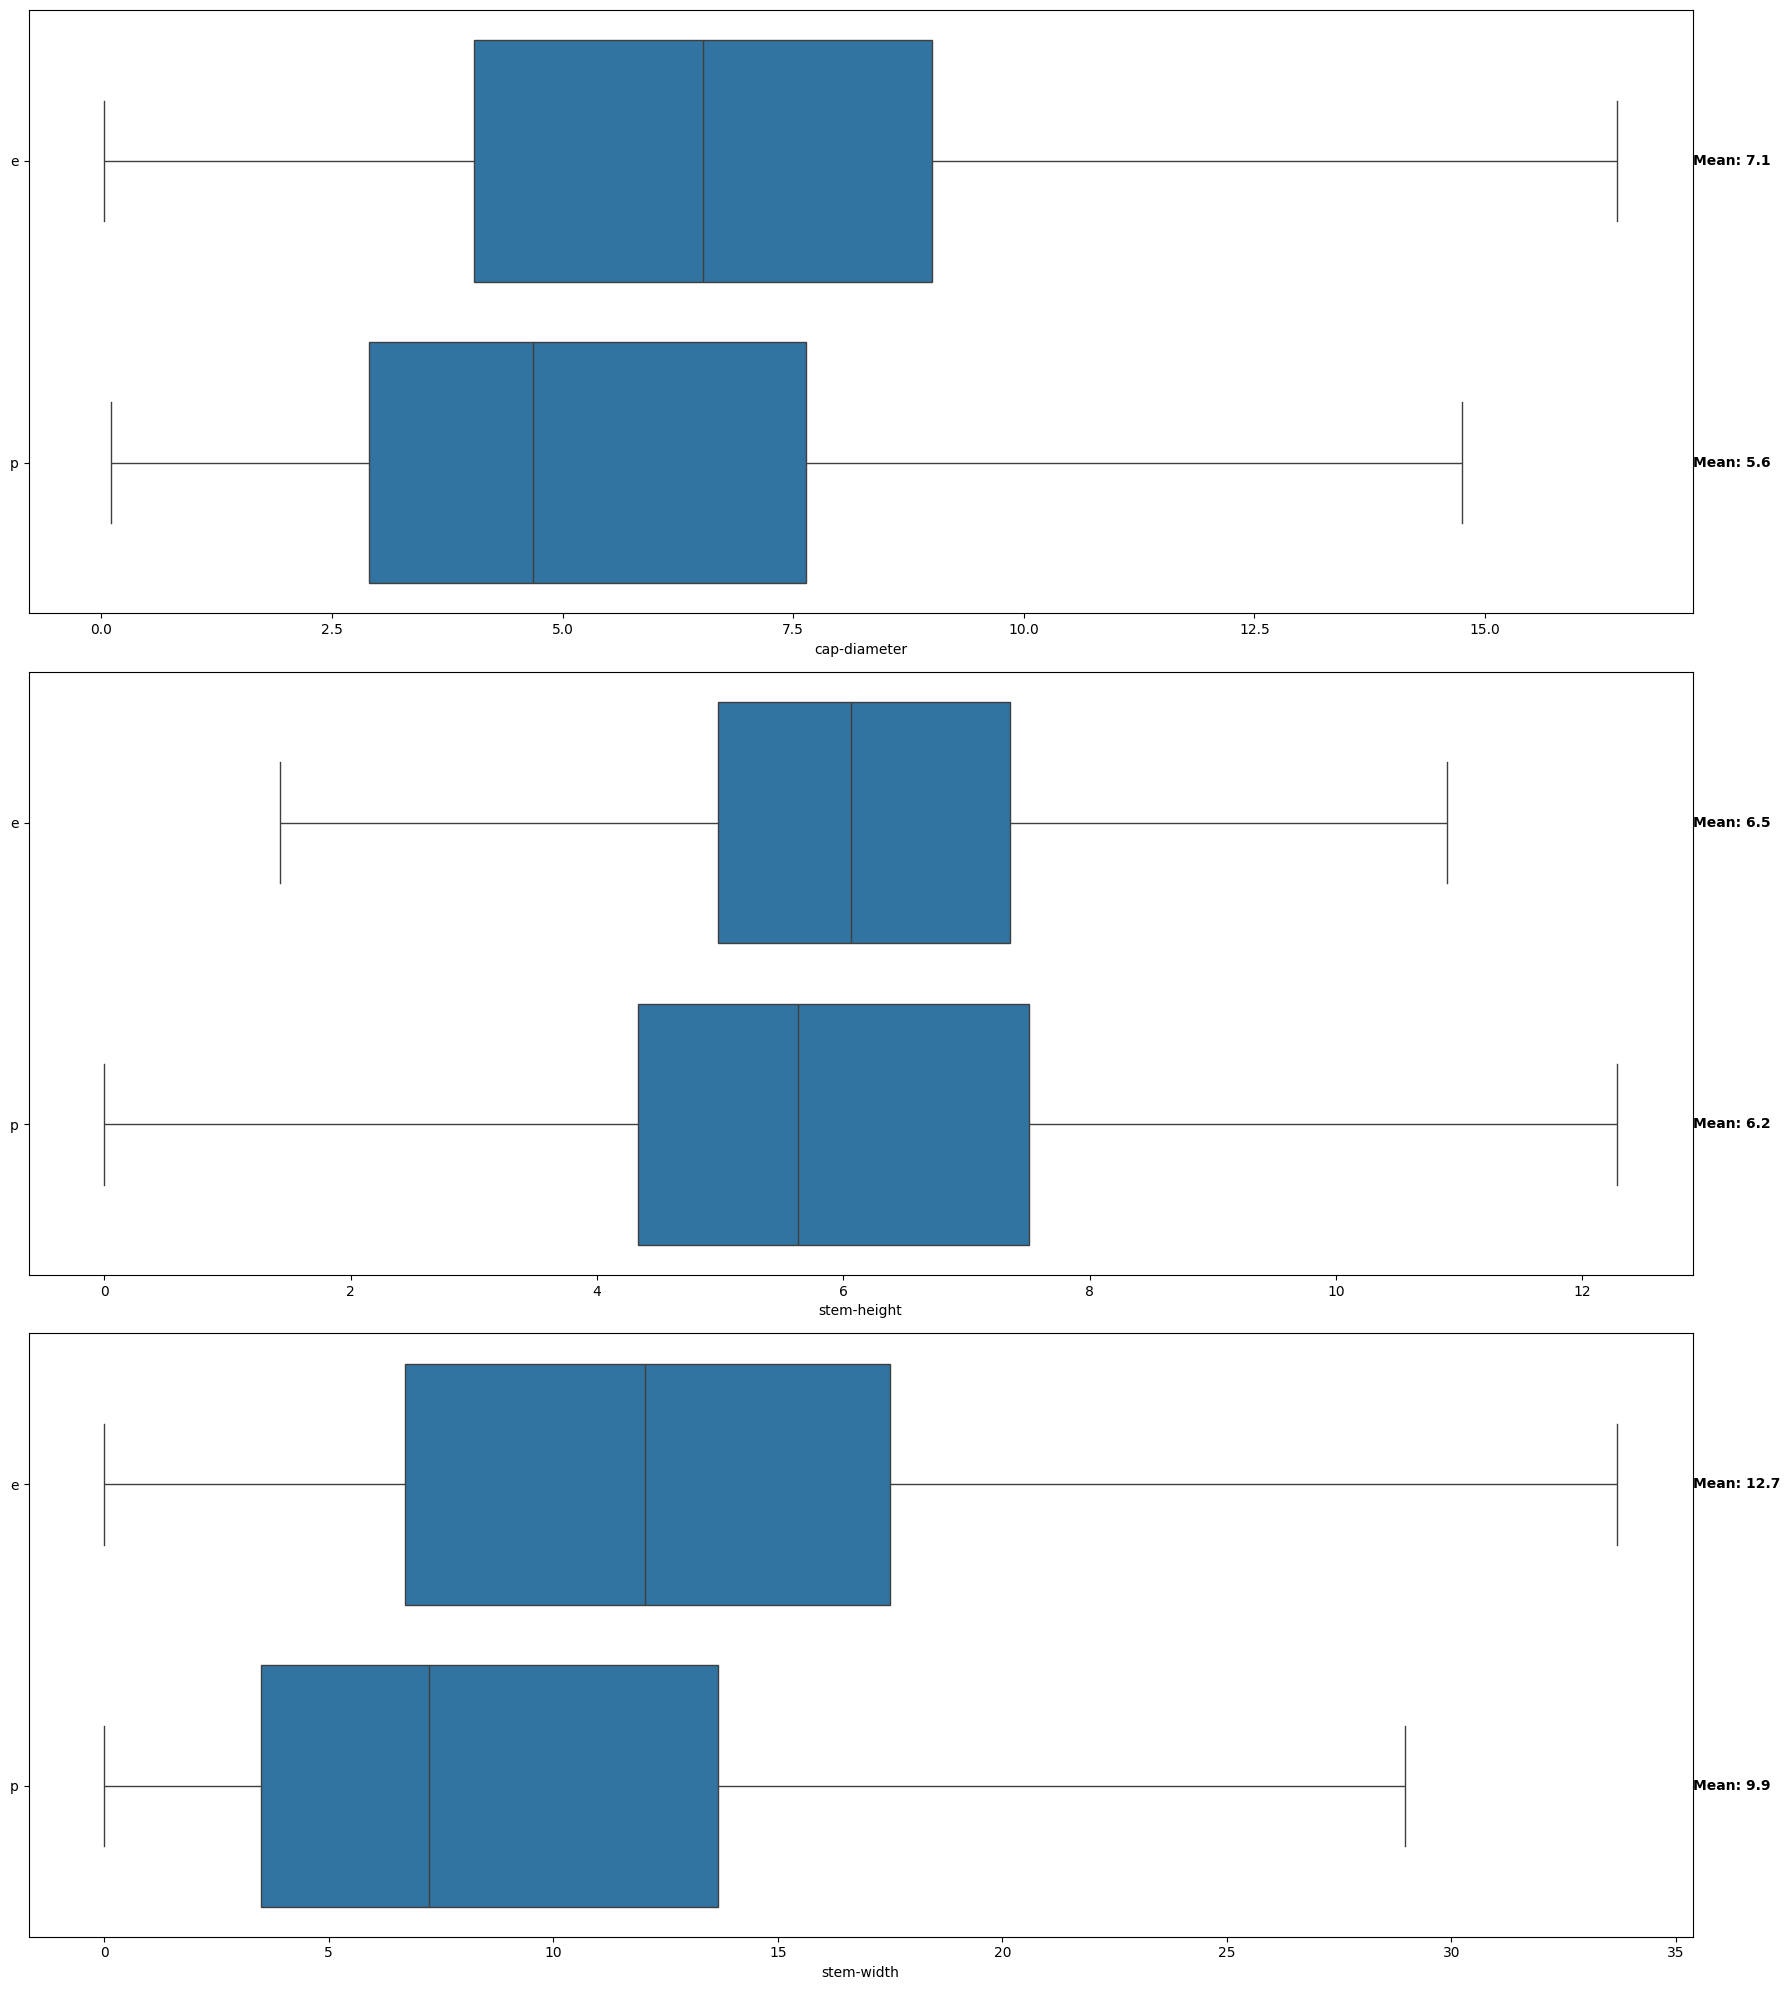

In [22]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    '''
    Function to create numerical distribution plots with optional segmentation feature.
    Parameters:
        features (list): List of numerical features to plot.
        df (DataFrame): DataFrame containing the data.
        segment_feature (str, optional): Feature to segment the data by. Default is None.
        showfliers (bool): Whether to show outliers in the plot. Default is True.
    '''
    fig, ax = plt.subplots(len(features), 1, figsize=(18, 20))

    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)

            for tick, label in enumerate(ax[i].get_yticklabels()):
                cat = label.get_text()
                mean_value = df[df[segment_feature] == cat][feature].mean()
                mean_text = f'Mean: {mean_value:.1f}'
                ax[i].text(ax[i].get_xlim()[1], tick, mean_text,
                           verticalalignment='center', size='medium', color='black', weight='semibold')
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
            mean_value = df[feature].mean()
            mean_text = f'Mean: {mean_value:.1f}'
            ax[i].text(ax[i].get_xlim()[1], 0, mean_text,
                       verticalalignment='center', size='medium', color='black', weight='semibold')

    plt.tight_layout()
    plt.show()

numerical_dis_plot(
    features=numeric_columns,
    df=df_train,
    segment_feature='class',
    showfliers=False
)

# Modeling akan menggunakan AutoGluon Tabular

In [291]:
label = 'class'

In [293]:
predictor = TabularPredictor(label=label).fit(df_train, time_limit=3600)

No path specified. Models will be saved in: "AutogluonModels\ag-20240810_130243"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "AutogluonModels\ag-20240810_130243"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.9.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19042
CPU Count:          8
M

[1000]	valid_set's binary_error: 0.0210053
[2000]	valid_set's binary_error: 0.0195375
[3000]	valid_set's binary_error: 0.0192439
[4000]	valid_set's binary_error: 0.0188199
[5000]	valid_set's binary_error: 0.018559
[6000]	valid_set's binary_error: 0.0185916


	0.9816	 = Validation score   (accuracy)
	768.81s	 = Training   runtime
	5.79s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 2801.01s of the 2801.0s of remaining time.


[1000]	valid_set's binary_error: 0.0198637
[2000]	valid_set's binary_error: 0.0193092
[3000]	valid_set's binary_error: 0.0190809
[4000]	valid_set's binary_error: 0.0188852


	0.9812	 = Validation score   (accuracy)
	504.72s	 = Training   runtime
	3.56s	 = Validation runtime
Fitting model: RandomForestGini ... Training model for up to 2292.41s of the 2292.39s of remaining time.
	To force training the model, specify the model hyperparameter "ag.max_memory_usage_ratio" to a larger value (currently 1.0, set to >=1.97 to avoid the error)
		To set the same value for all models, do the following when calling predictor.fit: `predictor.fit(..., ag_args_fit={"ag.max_memory_usage_ratio": VALUE})`
		Setting "ag.max_memory_usage_ratio" to values above 1 may result in out-of-memory errors. You may consider using a machine with more memory as a safer alternative.
	Not enough memory to train RandomForestGini... Skipping this model.
Fitting model: RandomForestEntr ... Training model for up to 2291.37s of the 2291.35s of remaining time.
	To force training the model, specify the model hyperparameter "ag.max_memory_usage_ratio" to a larger value (currently 1.0, set to >=1.97 

[1000]	valid_set's binary_error: 0.0192113
[2000]	valid_set's binary_error: 0.0191135


	0.981	 = Validation score   (accuracy)
	334.35s	 = Training   runtime
	2.13s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 740.49s of remaining time.
	Ensemble Weights: {'LightGBMXT': 0.941, 'CatBoost': 0.059}
	0.9816	 = Validation score   (accuracy)
	0.36s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 2862.65s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20240810_130243")


In [5]:
predictor = TabularPredictor.load("AutogluonModels\\ag-20240810_130243")

In [15]:
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2   0.981604    accuracy       5.817109   776.843506                0.000000           0.359149            2       True          6
1           LightGBMXT   0.981571    accuracy       5.785850   768.812397                5.785850         768.812397            1       True          1
2             LightGBM   0.981180    accuracy       3.559833   504.721422                3.559833         504.721422            1       True          2
3        LightGBMLarge   0.981017    accuracy       2.133862   334.346228                2.133862         334.346228            1       True          5
4              XGBoost   0.980984    accuracy       1.567348  1051.827241                1.567348        1051.827241            1       True          4
5             CatBoost   0

c:\Users\arsuy\.conda\envs\kaggle\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [7]:
y_pred = predictor.predict(df_test)

In [16]:
submission = pd.DataFrame({'id': df_test.id, 'Target': y_pred})
submission.to_csv('submission_1.csv', index=False)